In [1]:
# %matplotlib inline
# %matplotlib widget
# %matplotlib notebook

import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('../configs/')
sys.path.append('../helper/')
sys.path.append('../models/')
sys.path.append('../data/')

import torch
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import glob
import random
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import importlib
from ml_collections import config_flags
from absl import app
from absl import flags
from sklearn.metrics import explained_variance_score
from tqdm import tqdm

import models
import helper_functions as hpfn
import configs_model_natural as confmn
import configs_model_natural_inverted as confmni
import configs_model_natural_phase_randomized as confmnpr
import configs_model_gaussian as confmg
import moving_edges
import sawtooth_gradient


In [2]:
importlib.reload(confmn)

# get lists of hyper parameters
config = confmn.get_config()
D_cnn_list = config.D_cnn_list # list of depth
C_list = config.C_list # list of number of independent channels
Repeat = config.Repeat # repeat for different initializations
activationf = config.activationf # activation functions, which can be 'ReLU', 'LeakyReLU' or 'ELU'.
T = config.T # length in time (one for 10 ms)
od = config.od

figure_folder_paper = '../results/figures_for_paper/'
if not os.path.exists(figure_folder_paper):
    os.makedirs(figure_folder_paper)
    
variable_folder_paper = '../results/variables_for_paper/'
if not os.path.exists(variable_folder_paper):
    os.makedirs(variable_folder_paper)

data_type_list = ['original', 'inverted', 'phase_randomized', 'gaussian']
color_list4 = [[27/255, 158/255, 119/255], [217/255, 95/255, 2/255], [117/255, 112/255, 179/255], [231/255, 41/255, 138/255]]



#### Panel 1

0.08 0.32 2.02 13.03


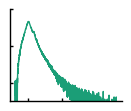

0.08 0.32 2.02 13.03


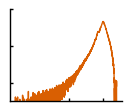

0.0 0.33 0.02 -0.12


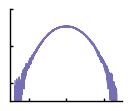

-0.0 0.32 -0.0 0.0


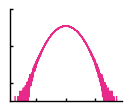

0.0 0.33 0.02 -0.12


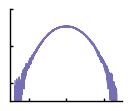

In [78]:
line_width = 1
label_size = 8
font_size = 8

fig = plt.figure(figsize=(1.2, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
####### natural
save_path = variable_folder_paper + 'stimuli_statistics_natural.npz'
statistics_list = np.load(save_path, allow_pickle=True)
h1 = statistics_list['arr_0'] 
bins1 = statistics_list['arr_1']
mean1, std1, skew1, kurtosis1 = statistics_list['arr_2']
ax = fig.add_subplot(gs[0, 0])
ax.plot(bins1[1:], h1, c=color_list4[0], linewidth=line_width)
ax.set_xticks([0, 2.5, 5.0])
ax.set_xticklabels([])
ax.set_ylim([10e-5, 4])
ax.set_yscale('log')
ax.set_yticks([10e-4, 10e-2, 10e0])
ax.set_yticklabels([])
# ax.set_xlabel('Pixel value', fontsize=font_size)
# ax.set_ylabel('Probability density', fontsize=font_size)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
ax.minorticks_off()
print(mean1, std1, skew1, kurtosis1)

fig.savefig(figure_folder_paper+'data_statistics_nature.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(1.2, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
####### inverted
save_path = variable_folder_paper + 'stimuli_statistics_natural.npz'
statistics_list = np.load(save_path, allow_pickle=True)
h1 = statistics_list['arr_0'] 
bins1 = statistics_list['arr_1']
mean1, std1, skew1, kurtosis1 = statistics_list['arr_2']
ax = fig.add_subplot(gs[0, 0])
ax.plot(-bins1[1:], h1, c=color_list4[1], linewidth=line_width)
ax.set_xticks([-5.0, -2.5, 0])
ax.set_xticklabels([])
ax.set_ylim([10e-5, 4])
ax.set_yscale('log')
ax.set_yticks([10e-4, 10e-2, 10e0])
ax.set_yticklabels([])
# ax.set_xlabel('Contrast')
# ax.set_ylabel('Probability density')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
ax.minorticks_off()
print(mean1, std1, skew1, kurtosis1)

fig.savefig(figure_folder_paper+'data_statistics_inverted.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(1.2, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
####### phase randomized
save_path = variable_folder_paper + 'stimuli_statistics_natural_phase_randomized.npz'
statistics_list = np.load(save_path, allow_pickle=True)
h1 = statistics_list['arr_0'] 
bins1 = statistics_list['arr_1']
mean1, std1, skew1, kurtosis1 = statistics_list['arr_2']
ax = fig.add_subplot(gs[0, 0])
ax.plot(bins1[1:], h1, c=color_list4[2], linewidth=line_width)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([])
ax.set_ylim([10e-5, 4])
ax.set_yscale('log')
ax.set_yticks([10e-4, 10e-2, 10e0])
ax.set_yticklabels([])
# ax.set_xlabel('Contrast')
# ax.set_ylabel('Probability density')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
ax.minorticks_off()
print(mean1, std1, skew1, kurtosis1)

# fig.savefig(figure_folder_paper+'data_statistics_phase_randomized.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(1.2, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
####### Gaussian
save_path = variable_folder_paper + 'stimuli_statistics_gaussian.npz'
statistics_list = np.load(save_path, allow_pickle=True)
h1 = statistics_list['arr_0'] 
bins1 = statistics_list['arr_1']
mean1, std1, skew1, kurtosis1 = statistics_list['arr_2']
ax = fig.add_subplot(gs[0, 0])
ax.plot(bins1[1:], h1, c=color_list4[3], linewidth=line_width)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([])
ax.set_ylim([10e-5, 4])
ax.set_yscale('log')
ax.set_yticks([10e-4, 10e-2, 10e0])
ax.set_yticklabels([])
# ax.set_xlabel('Contrast')
# ax.set_ylabel('Probability density')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
ax.minorticks_off()
print(mean1, std1, skew1, kurtosis1)

fig.savefig(figure_folder_paper+'data_statistics_gaussian.pdf', bbox_inches='tight')
plt.show()


##################### phase randomized with shuffling
fig = plt.figure(figsize=(1.2, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
####### phase randomized
save_path = variable_folder_paper + 'stimuli_statistics_natural_phase_randomized.npz'
statistics_list = np.load(save_path, allow_pickle=True)
h1 = statistics_list['arr_0'] 
bins1 = statistics_list['arr_1']
mean1, std1, skew1, kurtosis1 = statistics_list['arr_2']
ax = fig.add_subplot(gs[0, 0])
ax.plot(bins1[1:], h1, c=color_list4[2], linewidth=line_width)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels([])
ax.set_ylim([10e-5, 4])
ax.set_yscale('log')
ax.set_yticks([10e-4, 10e-2, 10e0])
ax.set_yticklabels([])
# ax.set_xlabel('Contrast')
# ax.set_ylabel('Probability density')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
ax.minorticks_off()
print(mean1, std1, skew1, kurtosis1)

fig.savefig(figure_folder_paper+'data_statistics_phase_randomized_new.pdf', bbox_inches='tight')
plt.show()

#### Panel 2, go to supp

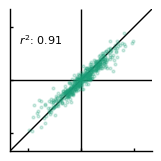

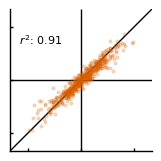

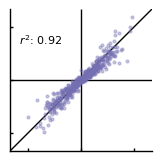

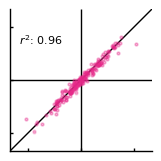

In [82]:
# predicted velocity
font_size = 8
label_size = 8


l1_regu = 0
l2_regu = 0
D_cnn = 1
C = 2
k1 = 3
k2 = 3
D_dense = 0
W = 0
R = 4

# natural
model_folder = f'../results/trained_models_natural_original/'
model_path = model_folder + f'Dcnn{D_cnn}_C{C}_' + config.activationf + f'_R{R+1}/'

y_test_all = torch.load(model_path + f'y_test_all.pth')
y_pred_all = torch.load(model_path + f'y_pred_all.pth')
explained_variance = np.round(explained_variance_score(y_test_all, y_pred_all), 2)
direction_accuracy = np.round((np.sign(y_test_all) == np.sign(y_pred_all)[:, 0]).sum()/len(y_pred_all), 2)


fig = plt.figure(figsize=(1.5, 1.5), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.vlines(0, -400, 400, 'k', linewidth=1)
ax.hlines(0, -400, 400, 'k', linewidth=1)
ax.plot([-400, 400], [-400, 400], 'k', linewidth=1)
ax.plot(y_test_all[::100], y_pred_all[::100], '.', c=color_list4[0], markersize=4, alpha=0.2)
ax.axis('scaled')
# ax.set_xlabel(r'Targets ($\degree$/s)', fontsize=font_size)
# ax.set_ylabel(r'Predicted ($\degree$/s)', fontsize=font_size)
ax.set_xlim([-400, 400])
ax.set_ylim([-400, 400])
ax.set_xticks([-300, 0, 300], [])
ax.set_yticks([-300, 0, 300], [])
ax.text(-350, 200, f'$r^{2}$: {explained_variance}', fontsize=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)

fig.savefig(figure_folder_paper + f'pred_vel_models_Dcnn{D_cnn}C{C}_nature.pdf', bbox_inches='tight')
plt.show()  


# inverted
model_folder = f'../results/trained_models_natural_inverted/'
model_path = model_folder + f'Dcnn{D_cnn}_C{C}_' + config.activationf + f'_R{R+1}/'

y_test_all = torch.load(model_path + f'y_test_all.pth')
y_pred_all = torch.load(model_path + f'y_pred_all.pth')
explained_variance = np.round(explained_variance_score(y_test_all, y_pred_all), 2)
direction_accuracy = np.round((np.sign(y_test_all) == np.sign(y_pred_all)[:, 0]).sum()/len(y_pred_all), 2)


fig = plt.figure(figsize=(1.5, 1.5), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.vlines(0, -400, 400, 'k', linewidth=1)
ax.hlines(0, -400, 400, 'k', linewidth=1)
ax.plot([-400, 400], [-400, 400], 'k', linewidth=1)
ax.plot(y_test_all[::100], y_pred_all[::100], '.', c=color_list4[1], markersize=4, alpha=0.2)
ax.axis('scaled')
ax.set_xlim([-400, 400])
ax.set_ylim([-400, 400])
ax.set_xticks([-300, 0, 300], [])
ax.set_yticks([-300, 0, 300], [])
ax.text(-350, 200, f'$r^{2}$: {explained_variance}', fontsize=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)

fig.savefig(figure_folder_paper + f'pred_vel_models_Dcnn{D_cnn}C{C}_inverted.pdf', bbox_inches='tight')
plt.show()  


# phase randomized
model_folder = f'../results/trained_models_natural_phase_randomized/'
model_path = model_folder + f'Dcnn{D_cnn}_C{C}_' + config.activationf + f'_R{R+1}/'

y_test_all = torch.load(model_path + f'y_test_all.pth')
y_pred_all = torch.load(model_path + f'y_pred_all.pth')
explained_variance = np.round(explained_variance_score(y_test_all, y_pred_all), 2)
direction_accuracy = np.round((np.sign(y_test_all) == np.sign(y_pred_all)[:, 0]).sum()/len(y_pred_all), 2)

fig = plt.figure(figsize=(1.5, 1.5), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.vlines(0, -400, 400, 'k', linewidth=1)
ax.hlines(0, -400, 400, 'k', linewidth=1)
ax.plot([-400, 400], [-400, 400], 'k', linewidth=1)
ax.plot(y_test_all[::100], y_pred_all[::100], '.', c=color_list4[2], markersize=4, alpha=0.2)
ax.axis('scaled')
ax.set_xlim([-400, 400])
ax.set_ylim([-400, 400])
ax.set_xticks([-300, 0, 300], [])
ax.set_yticks([-300, 0, 300], [])
ax.text(-350, 200, f'$r^{2}$: {explained_variance}', fontsize=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)

fig.savefig(figure_folder_paper + f'pred_vel_models_Dcnn{D_cnn}C{C}_phase_randomized.pdf', bbox_inches='tight')
plt.show()  


# gaussian
model_folder = '../results/trained_models_gaussian/'
model_path = model_folder + f'Dcnn{D_cnn}_C{C}_' + config.activationf + f'_R{R+1}/'

y_test_all = torch.load(model_path + f'y_test_all.pth')
y_pred_all = torch.load(model_path + f'y_pred_all.pth')
explained_variance = np.round(explained_variance_score(y_test_all, y_pred_all), 2)
direction_accuracy = np.round((np.sign(y_test_all) == np.sign(y_pred_all)[:, 0]).sum()/len(y_pred_all), 2)

fig = plt.figure(figsize=(1.5, 1.5), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.vlines(0, -400, 400, 'k', linewidth=1)
ax.hlines(0, -400, 400, 'k', linewidth=1)
ax.plot([-400, 400], [-400, 400], 'k', linewidth=1)
ax.plot(y_test_all[::100], y_pred_all[::100], '.', c=color_list4[3], markersize=4, alpha=0.2)
ax.axis('scaled')
ax.set_xlim([-400, 400])
ax.set_ylim([-400, 400])
ax.set_xticks([-300, 0, 300], [])
ax.set_yticks([-300, 0, 300], [])
ax.text(-350, 200, f'$r^{2}$: {explained_variance}', fontsize=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)

fig.savefig(figure_folder_paper + f'pred_vel_models_Dcnn{D_cnn}C{C}_gaussian.pdf', bbox_inches='tight')
plt.show()    


In [60]:
moving_edges_results_all = np.load('../results/variables_for_paper/moving_edges_results_all.npy')
sawtooth_results_all = np.load('../results/variables_for_paper/sawtooth_results_all.npy')
stimulus_1420_results_all = np.load(f'../results/variables_for_paper/stimulus_1420_results_all_xtess12.npy')

moving_edges_results_all_pr = np.load('../results/variables_for_paper/moving_edges_results_all_test_phase_randomized.npy')
sawtooth_results_all_pr = np.load('../results/variables_for_paper/sawtooth_results_all_test_phase_randomized.npy')
stimulus_1420_results_all_pr = np.load(f'../results/variables_for_paper/stimulus_1420_results_all_xtess12_test_phase_randomized.npy')

print(moving_edges_results_all.shape)
print(moving_edges_results_all_pr.shape)

(4, 2, 4, 4, 6, 500, 2)
(1, 2, 4, 5, 1, 500, 2)


In [61]:
sinwave_results_all = np.load(f'../results/variables_for_paper/sinwave_results_all_test.npy')
print(sinwave_results_all.shape)

(4, 2, 4, 500)


In [17]:
thres = 0.8

for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        for ii in range(4):
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][R_performance_array]
            print(ii, indC, indD, (sinwave_results_all[ii, indC, indD] == 0).sum(), (sinwave_results_all_tem == 0).sum())
            

0 0 0 0 0
1 0 0 0 0
2 0 0 0 0
3 0 0 0 0
0 0 1 0 0
1 0 1 0 0
2 0 1 18 0
3 0 1 2 0
0 0 2 7 0
1 0 2 6 0
2 0 2 72 0
3 0 2 55 1
0 0 3 83 0
1 0 3 77 0
2 0 3 264 5
3 0 3 302 108
0 1 0 0 0
1 1 0 0 0
2 1 0 0 0
3 1 0 0 0
0 1 1 0 0
1 1 1 0 0
2 1 1 1 0
3 1 1 0 0
0 1 2 0 0
1 1 2 0 0
2 1 2 2 0
3 1 2 0 0
0 1 3 1 0
1 1 3 1 0
2 1 3 40 0
3 1 3 25 12


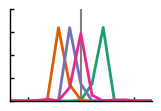

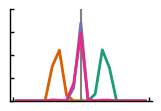

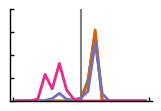

In [79]:
importlib.reload(hpfn)

font_size = 8
label_size = 8

C = 2
D_cnn = 1
thres = 0.8
indC = 0
indD = 0
indr = 0
indv = 5

fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.axvline(0, color='gray')
bins = np.linspace(-0.6, 0.6, 20)
for ii in [0, 1, 2, 3]:
    color_v = color_list4[ii]
    if ii == 0:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 1:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 2:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 3:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
    R_performance_array = (R_performance_array[:, 0]-1).astype(int)
    diff_all = moving_edges_results_all[ii, indC, indD, indr, indv, :, 0] - moving_edges_results_all[ii, indC, indD, indr, indv, :, 1]
    if ii == 2:
        diff_all = moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 0] - moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 1]
    movingedge_list = diff_all[R_performance_array]
    sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
    movingedge_list = movingedge_list[sinwave_results_all_tem>1]
    sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
    hist, bin_edges = np.histogram(movingedge_list/sinwave_results_all_tem, bins)
    bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
    ax.plot(bin_centers, hist / len(sinwave_results_all_tem), '-', c=color_list4[ii], linewidth=2)
ax.set_ylim([0, 1])
ax.set_xlim([-0.4, 0.4])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1], [])
ax.set_xticks([-0.3, 0, 0.3], [])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=3, width=1, labelsize=label_size)
# ax.set_ylabel('Fraction of \ntrained models\ntested on moving edges', fontsize=font_size)
fig.savefig(figure_folder_paper+'moving_edge_compare_C2D1_allconfig_new.pdf', bbox_inches='tight')


indr = 0
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.axvline(0, color='gray')
bins = np.linspace(-5, 5, 20)
for ii in [0, 1, 2, 3]:
    color_v = color_list4[ii]
    if ii == 0:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 1:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 2:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 3:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
    R_performance_array = (R_performance_array[:, 0]-1).astype(int)
    sawtooth_list = sawtooth_results_all[ii, indC, indD, indr, :, 0]
    if ii == 2:
        sawtooth_list = sawtooth_results_all_pr[0, indC, indD, 0, :, 0]
    sawtooth_list = sawtooth_list[R_performance_array] * 2
    sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
    sawtooth_list = sawtooth_list[sinwave_results_all_tem>1]
    sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
    hist, bin_edges = np.histogram(sawtooth_list/sinwave_results_all_tem, bins)
    bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
    ax.plot(bin_centers, hist / len(sinwave_results_all_tem), '-', c=color_list4[ii], linewidth=2)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1], [])
ax.set_xticks([-5, 0, 5], [])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=3, width=1, labelsize=label_size)
# ax.set_ylabel('Fraction of \ntrained models\ntested on sawtooth', fontsize=font_size)
fig.savefig(figure_folder_paper+'sawtooth_compare_C2D1_allconfig_new.pdf', bbox_inches='tight')


indr = 0
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.axvline(0, color='gray')
bins = np.linspace(-1, 1, 20)
for ii in [0, 1, 2, 3]:
    color_v = color_list4[ii]
    if ii == 0:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 1:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 2:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 3:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
    R_performance_array = (R_performance_array[:, 0]-1).astype(int)
    stimulus_14_list = stimulus_1420_results_all[ii, indC, indD, indr, :, 0]
    if ii == 2:
        stimulus_14_list = stimulus_1420_results_all_pr[0, indC, indD, 0, :, 0]
    stimulus_14_list = stimulus_14_list[R_performance_array] * 2
    sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
    stimulus_14_list = stimulus_14_list[sinwave_results_all_tem>1]
    sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
    hist, bin_edges = np.histogram(stimulus_14_list/sinwave_results_all_tem, bins)
    bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
    ax.plot(bin_centers, hist / len(sinwave_results_all_tem), '-', c=color_list4[ii], linewidth=2)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1], [])
ax.set_xticks([-1, 0, 1], [])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=3, width=1, labelsize=label_size)
# ax.set_ylabel('Fraction of \ntrained models\ntested on sawtooth', fontsize=font_size)

            
fig.savefig(figure_folder_paper+'s14_compare_C2D1_allconfig_new.pdf', bbox_inches='tight')

plt.show()

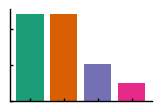

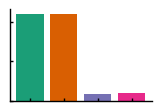

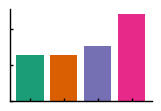

In [80]:
font_size = 10
label_size = 10


C = 2
D_cnn = 1
indC = 0
indD = 0

thres = 0.8
indr = 0
indv = 5

fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)

ax = fig.add_subplot(gs[0, 0])
movingedge_metric_array = np.zeros((4, 1))
for ii in range(4):
    if ii == 0:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 1:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 2:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 3:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
    R_performance_array = (R_performance_array[:, 0]-1).astype(int)
    diff_all = moving_edges_results_all[ii, indC, indD, indr, indv, :, 0] - moving_edges_results_all[ii, indC, indD, indr, indv, :, 1]
    if ii == 2:
        diff_all = moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 0] - moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 1]
    movingedge_list = diff_all[R_performance_array]
    sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
    movingedge_list = movingedge_list[sinwave_results_all_tem>1]
    sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
    movingedge_metric = np.median(abs(movingedge_list)/sinwave_results_all_tem)
    movingedge_metric_array[ii, 0] = movingedge_metric
ax.bar([0, 1, 2, 3], movingedge_metric_array[:, 0], color=color_list4)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.set_xticks([0, 1, 2, 3], [])
ax.set_yticks([0, 0.05, 0.1], [])
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
# ax.set_ylabel('Fraction of\nmodels with\nT-antisymm', fontsize=font_size)
fig.savefig(figure_folder_paper+'moving_edge_compare_C2D1_allconfig_metric_new.pdf', bbox_inches='tight')


indr = 0
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
sawtooth_metric_array = np.zeros((4, 1))
for ii in range(4):
    if ii == 0:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 1:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 2:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 3:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
    R_performance_array = (R_performance_array[:, 0]-1).astype(int)
    sawtooth_list = sawtooth_results_all[ii, indC, indD, indr, :, 0]
    if ii == 2:
        sawtooth_list = sawtooth_results_all_pr[0, indC, indD, 0, :, 0]
    sawtooth_list = sawtooth_list[R_performance_array] * 2
    sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
    sawtooth_list = sawtooth_list[sinwave_results_all_tem>1]
    sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
    sawtooth_metric = np.median(abs(sawtooth_list)/sinwave_results_all_tem)
    sawtooth_metric_array[ii, 0] = sawtooth_metric
ax.bar([0, 1, 2, 3], sawtooth_metric_array[:, 0], color=color_list4)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.set_xticks([0, 1, 2, 3], [])
ax.set_yticks([0, 0.8, 1.6], [])
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
# ax.set_ylabel('Fraction of\nmodels with\nT-antisymm', fontsize=font_size)
fig.savefig(figure_folder_paper+'sawtooth_compare_C2D1_allconfig_metric_new.pdf', bbox_inches='tight')


indr = 0
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
s14_metric_array = np.zeros((4, 1))
for ii in range(4):
    if ii == 0:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 1:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 2:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
    elif ii == 3:
        R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
    R_performance_array = (R_performance_array[:, 0]-1).astype(int)
    stimulus_14_list = stimulus_1420_results_all[ii, indC, indD, indr, :, 0]
    if ii == 2:
        stimulus_14_list = stimulus_1420_results_all_pr[0, indC, indD, 0, :, 0]
    stimulus_14_list = stimulus_14_list[R_performance_array] * 2
    sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
    stimulus_14_list = stimulus_14_list[sinwave_results_all_tem>1]
    sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
    s14_metric = np.median(abs(stimulus_14_list)/sinwave_results_all_tem)
    s14_metric_array[ii, 0] = s14_metric
ax.bar([0, 1, 2, 3], s14_metric_array[:, 0], color=color_list4)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.set_xticks([0, 1, 2, 3], [])
ax.set_yticks([0, 0.15, 0.3], [])
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
# ax.set_ylabel('Fraction of\nmodels with\nT-antisymm', fontsize=font_size)
            
fig.savefig(figure_folder_paper+'s14_compare_C2D1_allconfig_metric_new.pdf', bbox_inches='tight')

plt.show()

#### Test on synthetic data, all models

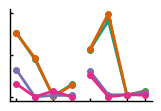

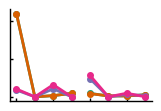

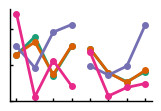

In [81]:
C_list = [2, 4]
D_cnn_list = [1, 2, 3, 4]

font_size = 7
label_size = 7

thres = 0.8
indr = 0
indv = 5
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
movingedge_metric_all = np.zeros((len(data_type_list), len(C_list), len(D_cnn_list)))
for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        for ii in range(4):
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            diff_all = moving_edges_results_all[ii, indC, indD, indr, indv, :, 0] - moving_edges_results_all[ii, indC, indD, indr, indv, :, 1]
            if ii == 2:
                diff_all = moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 0] - moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 1]
            movingedge_list = diff_all[R_performance_array]
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            movingedge_list = movingedge_list[sinwave_results_all_tem>1]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            movingedge_metric_all[ii, indC, indD] = np.median(abs(movingedge_list)/sinwave_results_all_tem)
for ind, ii in enumerate([0, 1, 2, 3]):
    l1 = ax.plot(range(1, 5), movingedge_metric_all[ii, 0, :], 'o-', c=color_list4[ind], linewidth=2, markersize=4)
    ax.plot(range(5, 9), movingedge_metric_all[ii, 1, :], 'o-', c=color_list4[ind], linewidth=2, markersize=4)
ax.set_xticks(range(1, 9))
ax.set_xticklabels([])
ax.set_yticks([0, 0.08, 0.16], [])
# ax.set_xlabel('\n\n Model configurations', fontsize=font_size)
# ax.set_ylabel('Fraction of\nmodels with\nT-antisymm', fontsize=font_size)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)

fig.savefig(figure_folder_paper+'moving_edge_compare_metric_all_models_new.pdf', bbox_inches='tight')
plt.show()


indr = 0
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
sawtooth_metric_all = np.zeros((len(data_type_list), len(C_list), len(D_cnn_list)))
for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        for ii in range(4):
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            sawtooth_list = sawtooth_results_all[ii, indC, indD, indr, :, 0]
            if ii == 2:
                sawtooth_list = sawtooth_results_all_pr[0, indC, indD, 0, :, 0]
            sawtooth_list = sawtooth_list[R_performance_array] * 2
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            sawtooth_list = sawtooth_list[sinwave_results_all_tem>1]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            sawtooth_metric_all[ii, indC, indD] = np.median(abs(sawtooth_list)/sinwave_results_all_tem)
for ind, ii in enumerate([0, 1, 2, 3]):
    l1 = ax.plot(range(1, 5), sawtooth_metric_all[ii, 0, :], 'o-', c=color_list4[ind], linewidth=2, markersize=4)
    ax.plot(range(5, 9), sawtooth_metric_all[ii, 1, :], 'o-', c=color_list4[ind], linewidth=2, markersize=4)
ax.set_xticks(range(1, 9))
ax.set_xticklabels([])
ax.set_yticks([0, 0.8, 1.6], [])
# ax.set_xlabel('\n\n Model configurations', fontsize=font_size)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
                   
fig.savefig(figure_folder_paper+'sawtooth_compare_metric_all_models_new.pdf', bbox_inches='tight')

plt.show()


indr = 0
fig = plt.figure(figsize=(1.5, 1.), constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
s14_metric_all = np.zeros((len(data_type_list), len(C_list), len(D_cnn_list)))
for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        for ii in range(4):
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            stimulus_14_list = stimulus_1420_results_all[ii, indC, indD, indr, :, 0]
            if ii == 2:
                stimulus_14_list = stimulus_1420_results_all_pr[0, indC, indD, 0, :, 0]
            stimulus_14_list = stimulus_14_list[R_performance_array] * 2
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            stimulus_14_list = stimulus_14_list[sinwave_results_all_tem>1]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            s14_metric_all[ii, indC, indD] = np.median(abs(stimulus_14_list)/sinwave_results_all_tem)
for ind, ii in enumerate([0, 1, 2, 3]):
    l1 = ax.plot(range(1, 5), s14_metric_all[ii, 0, :], 'o-', c=color_list4[ind], linewidth=2, markersize=4)
    ax.plot(range(5, 9), s14_metric_all[ii, 1, :], 'o-', c=color_list4[ind], linewidth=2, markersize=4)
ax.set_xticks(range(1, 9))
ax.set_xticklabels([])
ax.set_yticks([0, 0.15, 0.3], [])
# ax.set_xlabel('\n\n Model configurations', fontsize=font_size)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
                   
fig.savefig(figure_folder_paper+'s14_compare_metric_all_models_new.pdf', bbox_inches='tight')
plt.show()


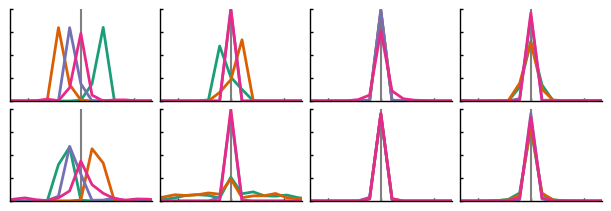

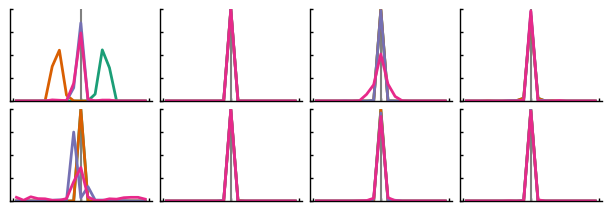

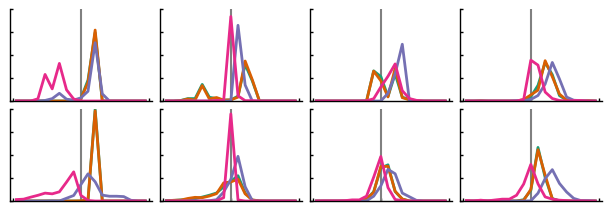

In [83]:
C_list = [2, 4]
D_cnn_list = [1, 2, 3, 4]

importlib.reload(hpfn)

font_size = 10
label_size = 10

thres = 0.8
indr = 0
indv = 5

fig = plt.figure(figsize=(6, 2), constrained_layout=True)
gs = GridSpec(len(C_list), len(D_cnn_list), figure=fig)

for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        ax = fig.add_subplot(gs[indC, indD])
        ax.axvline(0, color='gray')
        bins = np.linspace(-0.6, 0.6, 20)
        for ii in range(4):
            color_v = color_list4[ii]
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            diff_all = moving_edges_results_all[ii, indC, indD, indr, indv, :, 0] - moving_edges_results_all[ii, indC, indD, indr, indv, :, 1]
            if ii == 2:
                diff_all = moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 0] - moving_edges_results_all_pr[0, indC, indD, 1, 0, :, 1]
            movingedge_list = diff_all[R_performance_array]
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            movingedge_list = movingedge_list[sinwave_results_all_tem>1]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            hist, bin_edges = np.histogram(movingedge_list / sinwave_results_all_tem, bins)
            bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
            ax.plot(bin_centers, hist / len(sinwave_results_all_tem), '-', c=color_list4[ii], linewidth=2)
        ax.set_ylim([0, 1])
        ax.set_xlim([-0.4, 0.4])
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1], [])
        ax.set_xticks([-0.3, 0, 0.3], [])
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(True)
        ax.spines["left"].set_visible(True)
        ax.spines["bottom"].set_linewidth(1)
        ax.spines["left"].set_linewidth(1)
        ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
fig.savefig(figure_folder_paper+'moving_edge_compare_all_models_allconfig_new.pdf', bbox_inches='tight')
plt.show()


indr = 0
fig = plt.figure(figsize=(6, 2), constrained_layout=True)
gs = GridSpec(len(C_list), len(D_cnn_list), figure=fig)

for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        ax = fig.add_subplot(gs[indC, indD])
        ax.axvline(0, color='gray')
        bins = np.linspace(-5, 5, 20)
        for ii in range(4):
            color_v = color_list4[ii]
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            sawtooth_list = sawtooth_results_all[ii, indC, indD, indr, :, 0]
            if ii == 2:
                sawtooth_list = sawtooth_results_all_pr[0, indC, indD, 0, :, 0]
            sawtooth_list = sawtooth_list[R_performance_array] * 2
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            sawtooth_list = sawtooth_list[sinwave_results_all_tem>1]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            hist, bin_edges = np.histogram(sawtooth_list / sinwave_results_all_tem, bins)
            bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
            ax.plot(bin_centers,  hist / len(sinwave_results_all_tem), '-', c=color_list4[ii], linewidth=2)
        ax.set_ylim([0, 1])
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1], [])
        ax.set_xticks([-5, 0, 5], [])
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(True)
        ax.spines["left"].set_visible(True)
        ax.spines["bottom"].set_linewidth(1)
        ax.spines["left"].set_linewidth(1)
        ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
fig.savefig(figure_folder_paper+'sawtooth_compare_all_models_allconfig_new.pdf', bbox_inches='tight')
plt.show()


indr = 0
fig = plt.figure(figsize=(6, 2), constrained_layout=True)
gs = GridSpec(len(C_list), len(D_cnn_list), figure=fig)

for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        ax = fig.add_subplot(gs[indC, indD])
        ax.axvline(0, color='gray')
        bins = np.linspace(-1, 1, 20)
        for ii in range(4):
            color_v = color_list4[ii]
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            stimulus_14_list = stimulus_1420_results_all[ii, indC, indD, indr, :, 0]
            if ii == 2:
                stimulus_14_list = stimulus_1420_results_all_pr[0, indC, indD, 0, :, 0]
            stimulus_14_list = stimulus_14_list[R_performance_array] * 2
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            stimulus_14_list = stimulus_14_list[sinwave_results_all_tem>1]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            hist, bin_edges = np.histogram(stimulus_14_list / sinwave_results_all_tem, bins)
            bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
            ax.plot(bin_centers,  hist / len(sinwave_results_all_tem), '-', c=color_list4[ii], linewidth=2)
        ax.set_ylim([0, 1])
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1], [])
        ax.set_xticks([-1, 0, 1], [])
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(True)
        ax.spines["left"].set_visible(True)
        ax.spines["bottom"].set_linewidth(1)
        ax.spines["left"].set_linewidth(1)
        ax.tick_params(direction='in', length=2, width=1, labelsize=label_size)
fig.savefig(figure_folder_paper+'S14_compare_all_models_allconfig_new.pdf', bbox_inches='tight')
plt.show()




#### Check how mnay trained models have performance that is above 0.8

In [43]:
for indC, C in enumerate(C_list):
    for indD, D_cnn in enumerate(D_cnn_list):
        for ii in range(4):
            if ii == 0:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_natural_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 1:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_inverted_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 2:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_phase_random_C{C}_D{D_cnn}_thres{thres}.npy')
            elif ii == 3:
                R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_C{C}_D{D_cnn}_thres{thres}.npy')
#             elif ii == 4:
#                 R_performance_array = np.load(f'../results/variables_for_paper/R_performance_array_gaussian_corr_C{C}_D{D_cnn}_thres{thres}.npy')
            R_performance_array = (R_performance_array[:, 0]-1).astype(int)
            sinwave_results_all_tem = sinwave_results_all[ii, indC, indD][(R_performance_array)]
            sinwave_results_all_tem = sinwave_results_all_tem[sinwave_results_all_tem>1]
            print(ii, C, D_cnn, len(R_performance_array), len(sinwave_results_all_tem))
        

0 2 1 477 477
1 2 1 491 491
2 2 1 500 500
3 2 1 500 500
0 2 2 492 492
1 2 2 500 500
2 2 2 482 482
3 2 2 498 498
0 2 3 487 487
1 2 3 494 494
2 2 3 428 428
3 2 3 446 445
0 2 4 410 410
1 2 4 423 423
2 2 4 241 233
3 2 4 306 184
0 4 1 491 491
1 4 1 500 500
2 4 1 500 500
3 4 1 500 500
0 4 2 493 493
1 4 2 500 500
2 4 2 499 499
3 4 2 500 500
0 4 3 494 494
1 4 3 500 500
2 4 3 498 498
3 4 3 500 492
0 4 4 491 491
1 4 4 499 499
2 4 4 459 459
3 4 4 487 448
